In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('winedata.csv')

In [3]:
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [4]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

<Axes: >

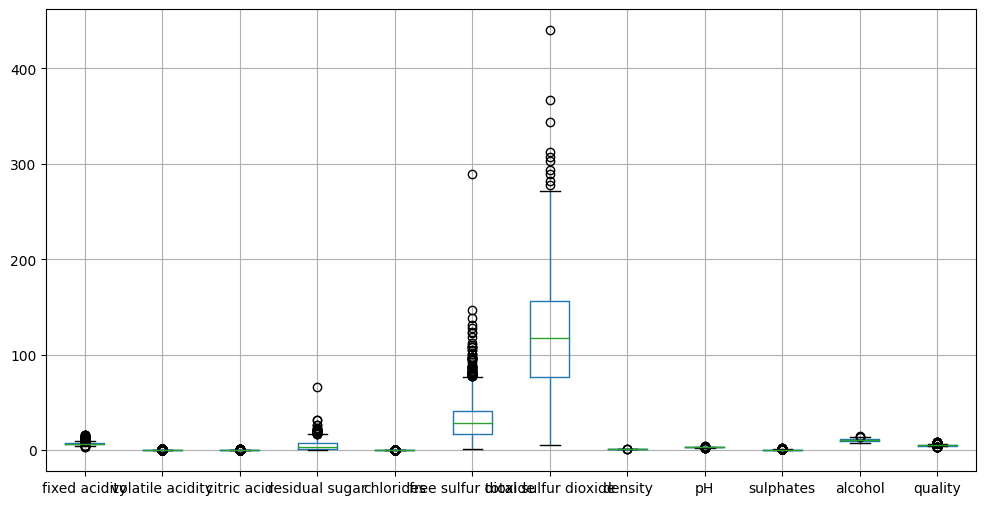

In [5]:
plt.figure(figsize=(12,6))
df.boxplot()


In [6]:
df['fixed acidity'].fillna(df['fixed acidity'].median(),inplace=True)
df['volatile acidity'].fillna(df['volatile acidity'].median(),inplace=True)
df['citric acid'].fillna(df['citric acid'].median(),inplace=True)
df['pH'].fillna(df['pH'].median(),inplace=True)


In [7]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.dropna(subset=['residual sugar', 'chlorides', 'sulphates'], inplace=True)



In [9]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

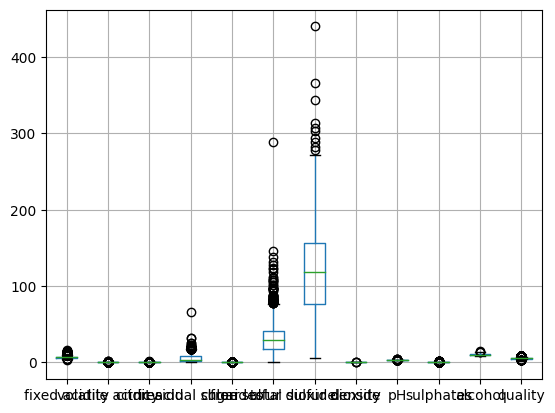

In [10]:
df.boxplot()

In [11]:
# Example: One-hot encode the 'gender' column
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6489 rows x 13 columns]

In [12]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)


In [13]:
df['type_white'] = df['type_white'].astype(int)

In [14]:
for column in df:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [15]:
df
print(df)
#1 is white 

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
5               8.1              0.28         0.40             6.9      0.050   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.29         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

<Axes: xlabel='type_white', ylabel='count'>

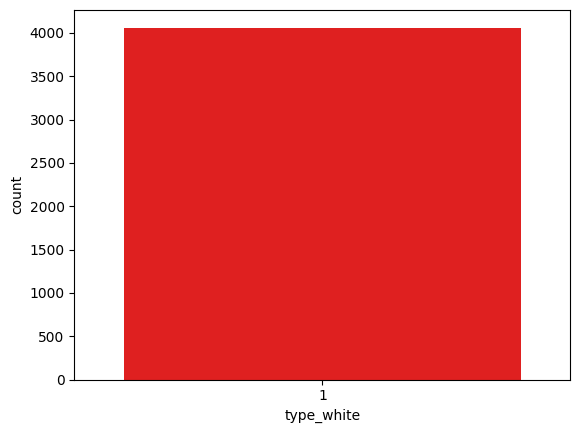

In [16]:
rang=['red','green','pink']
sns.countplot(x='type_white',data=df,palette=rang)

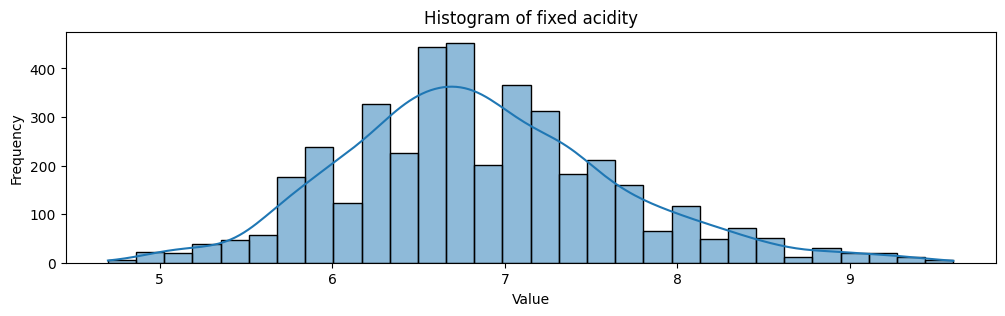

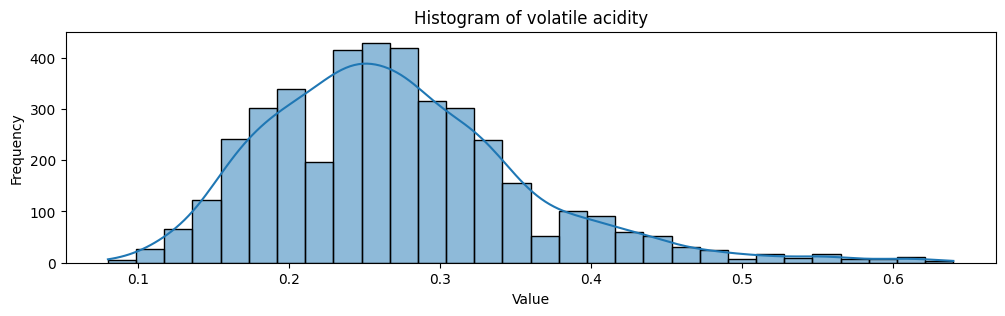

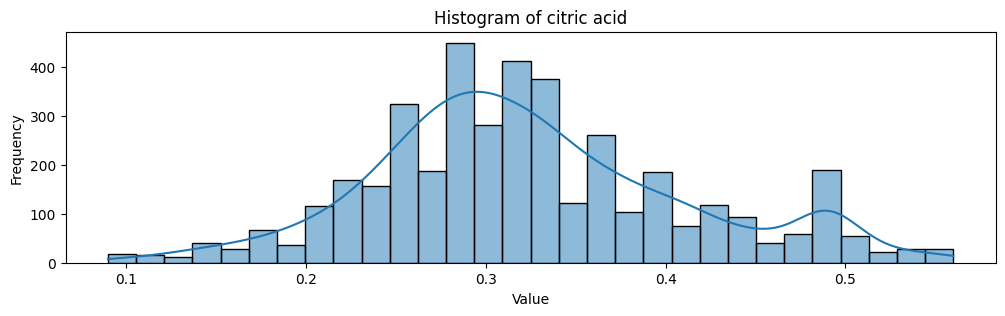

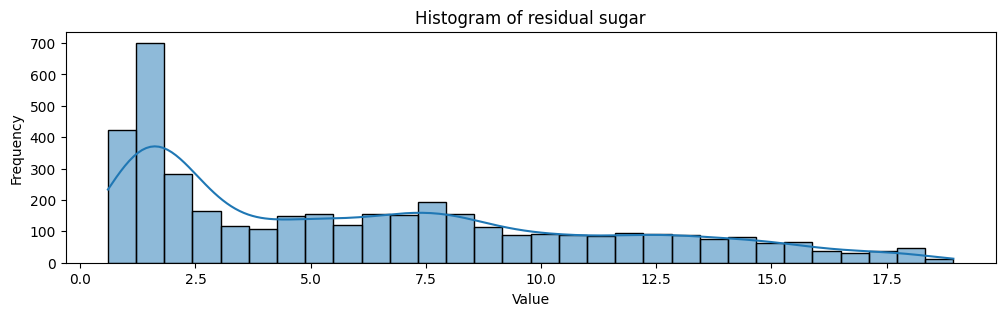

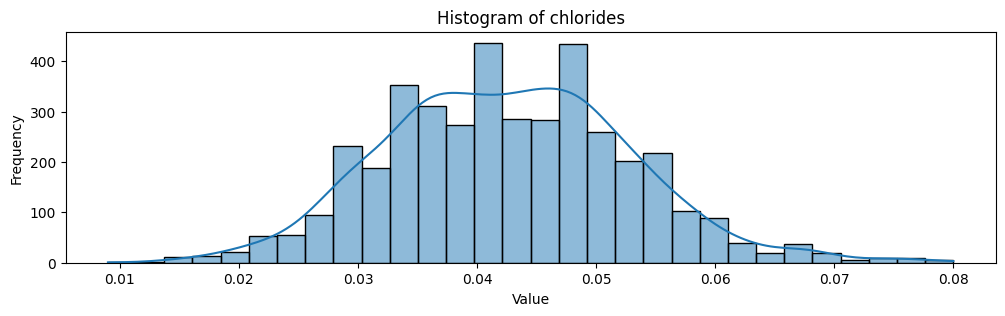

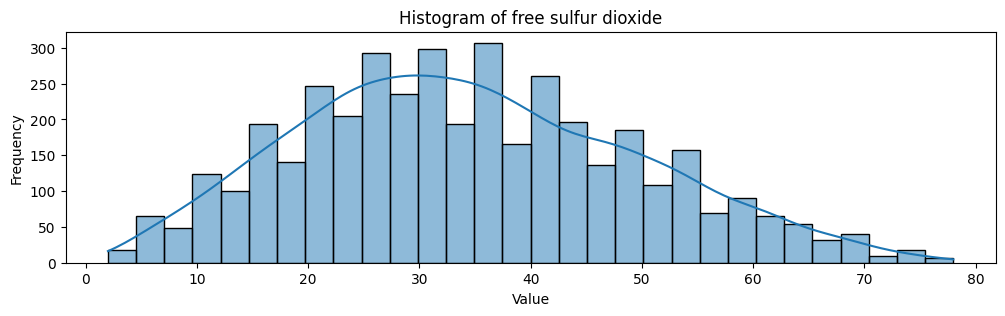

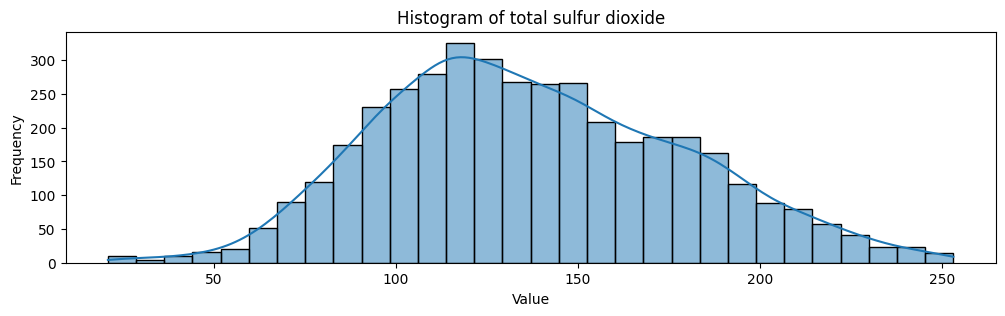

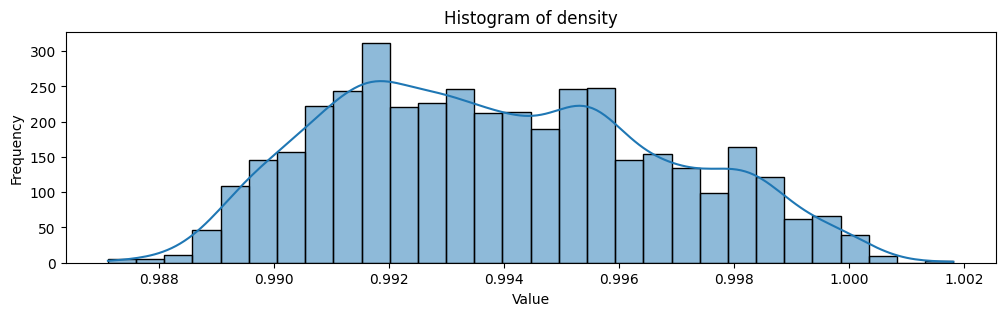

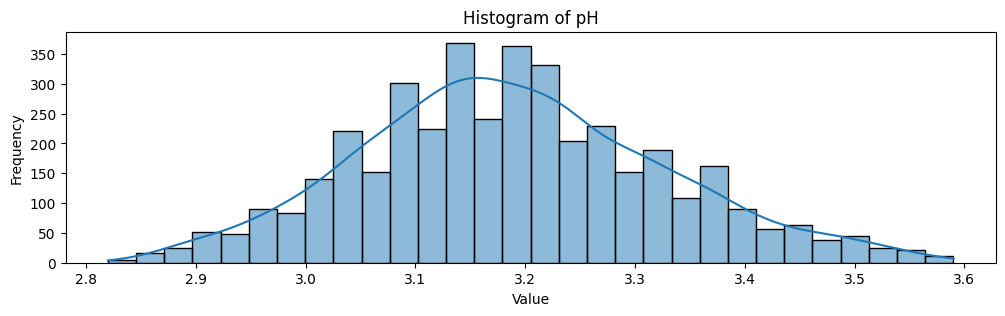

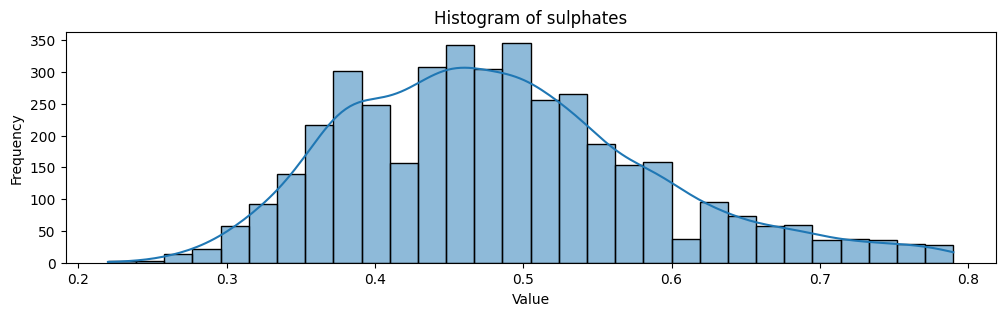

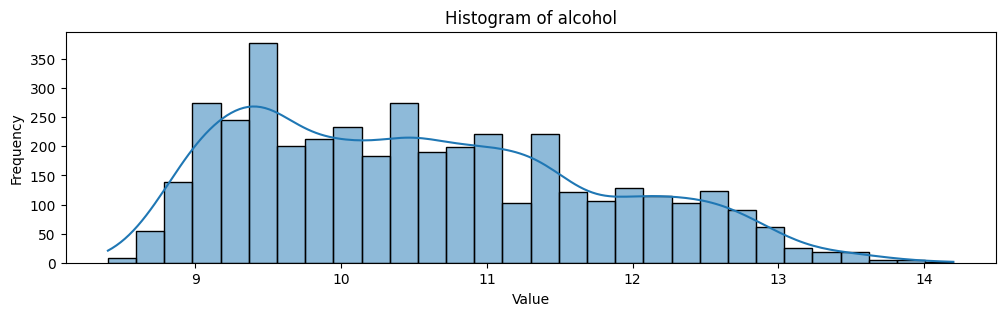

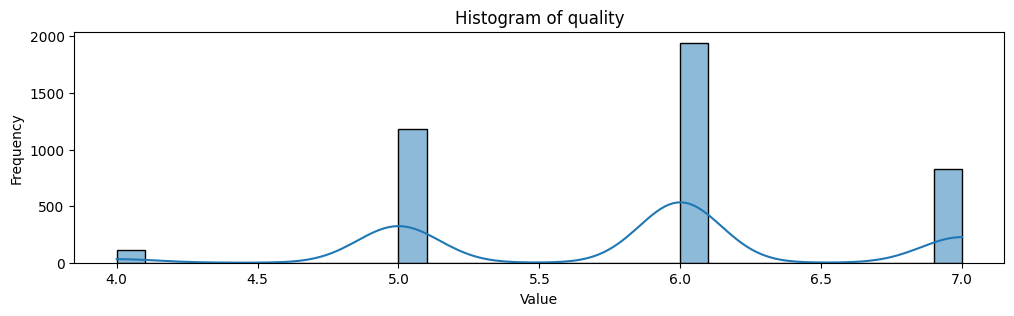

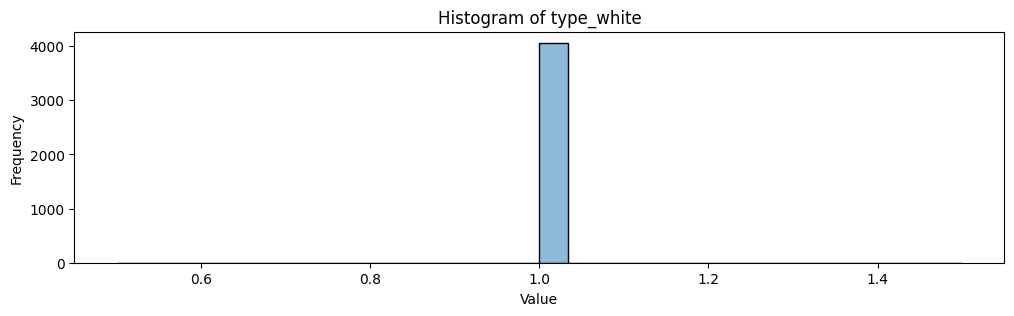

In [17]:

for column in df.columns:
    plt.figure(figsize=(12, 3))  # Adjust figure size as needed
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

C:\Users\Akshra_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

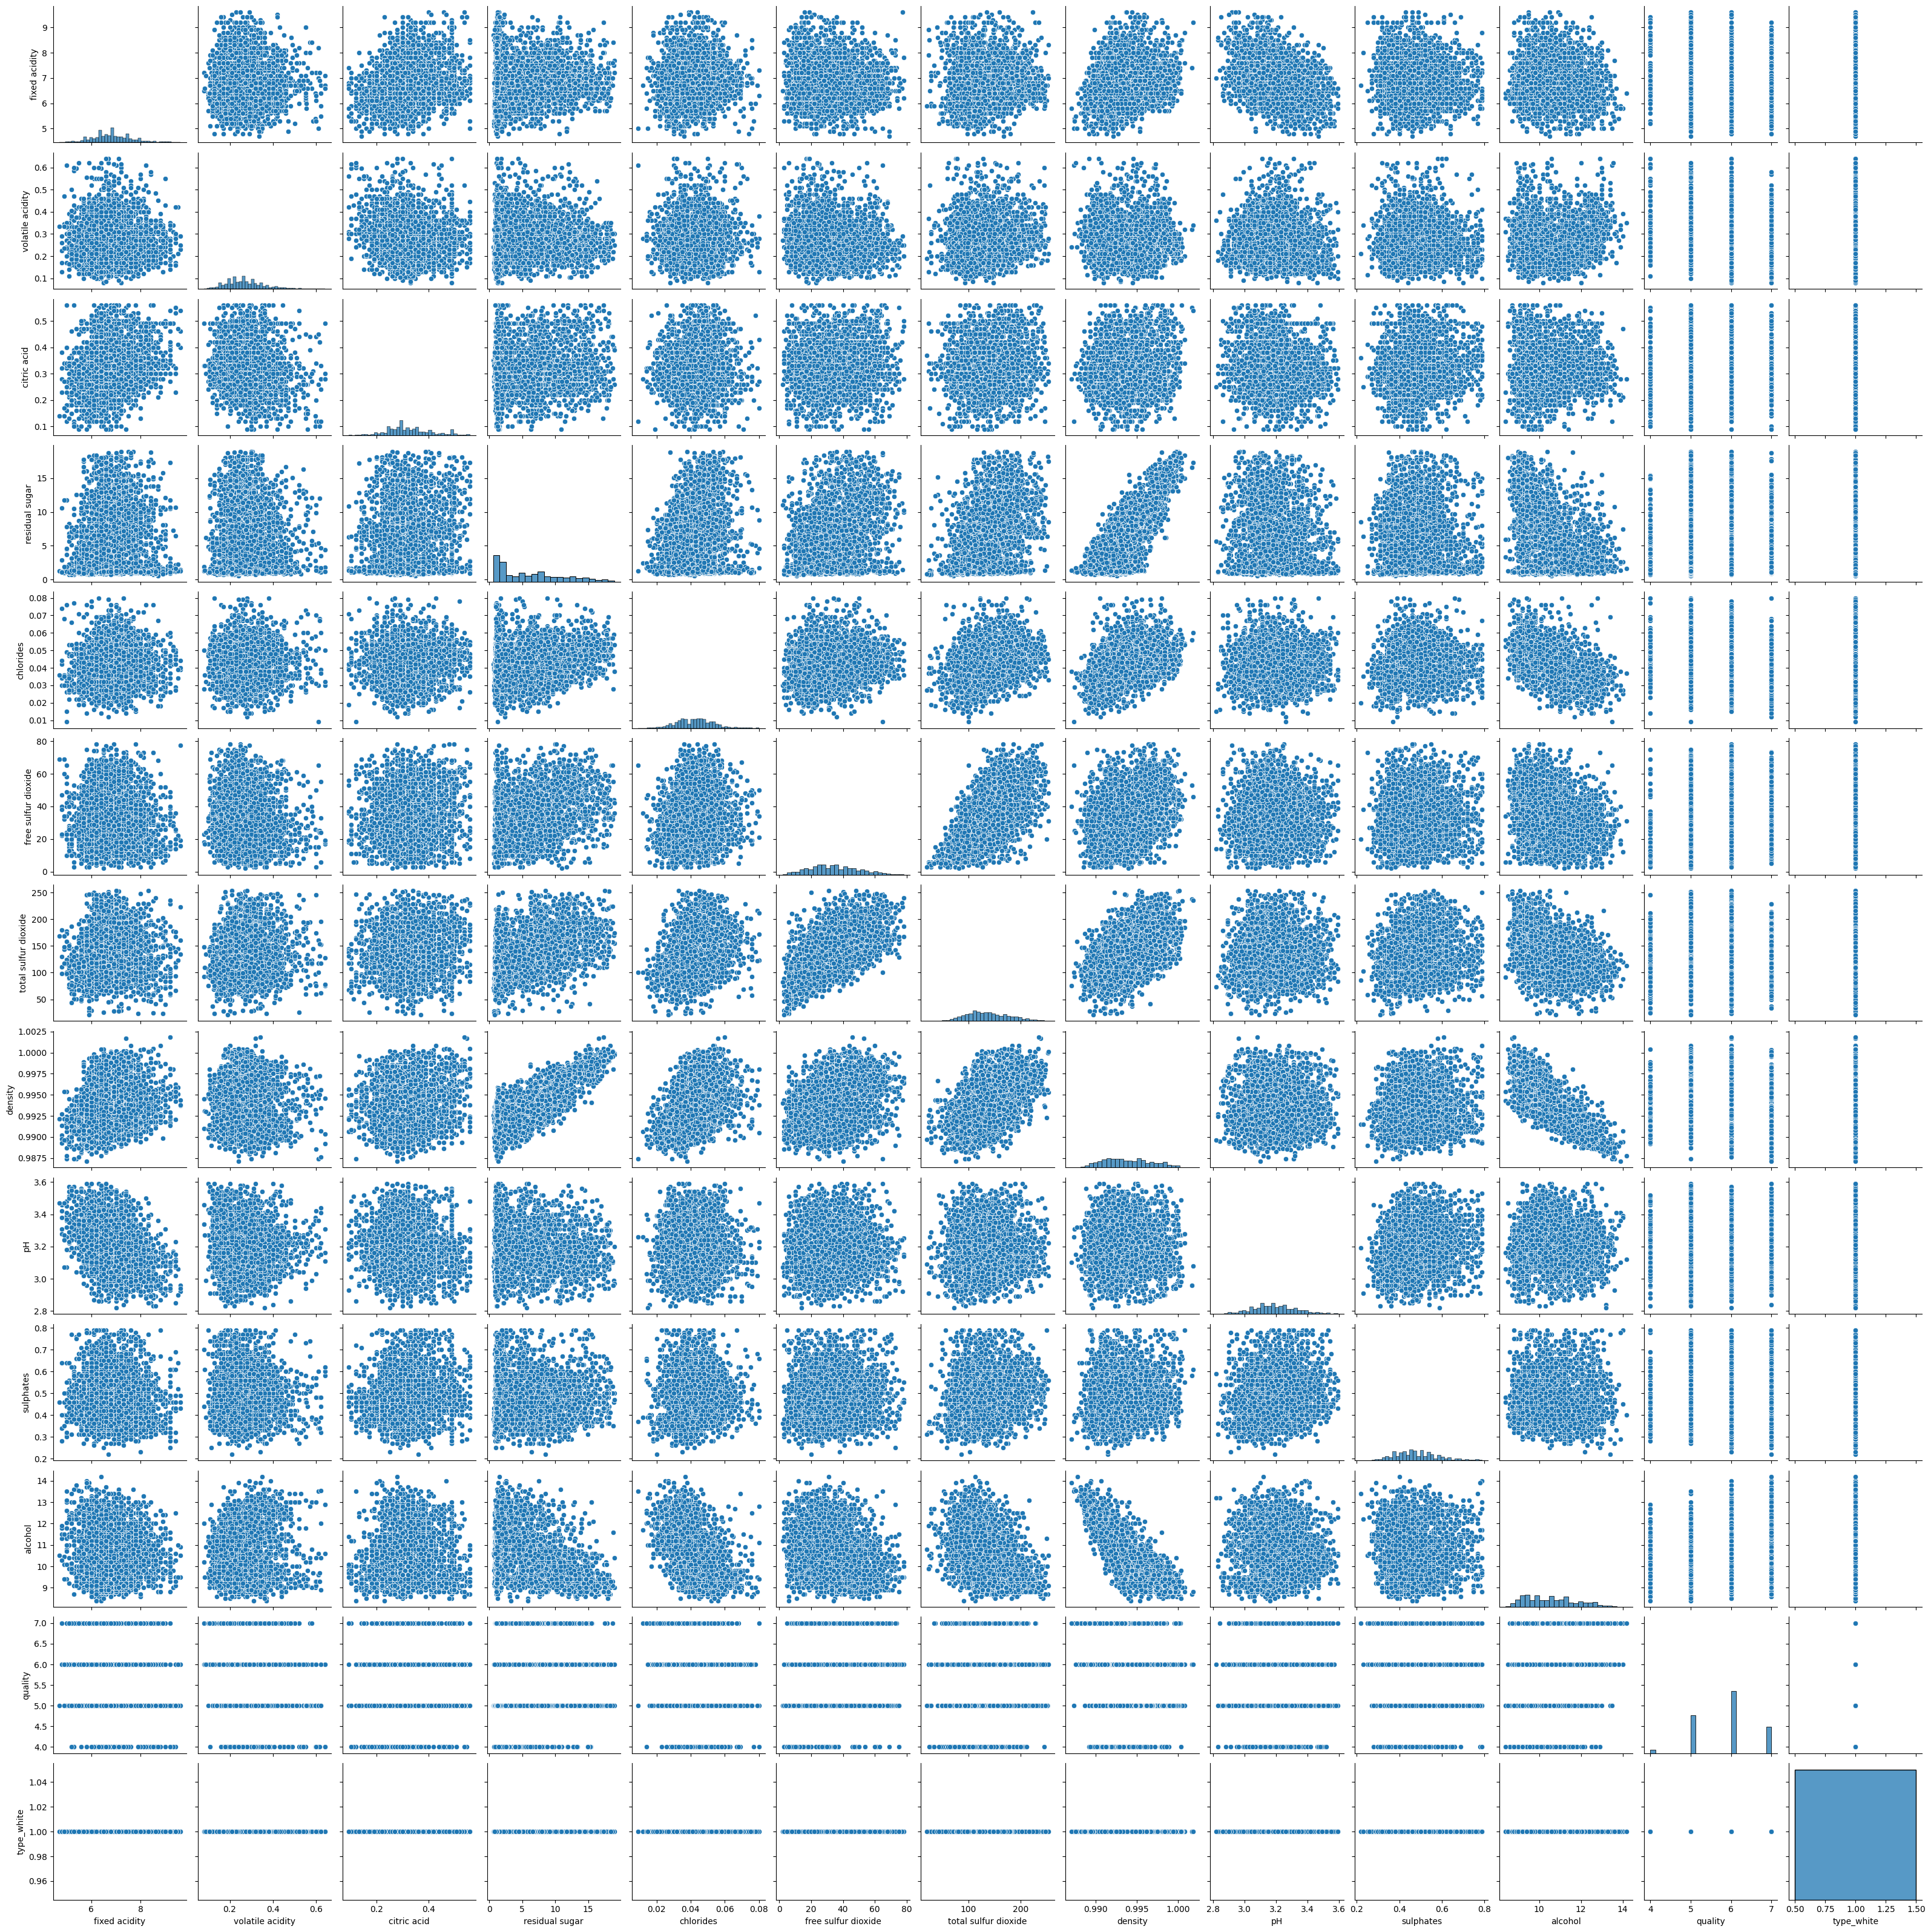

In [18]:
plt.figure(figsize=(10,6))
sns.pairplot(df, diag_kind='hist')
plt.show()

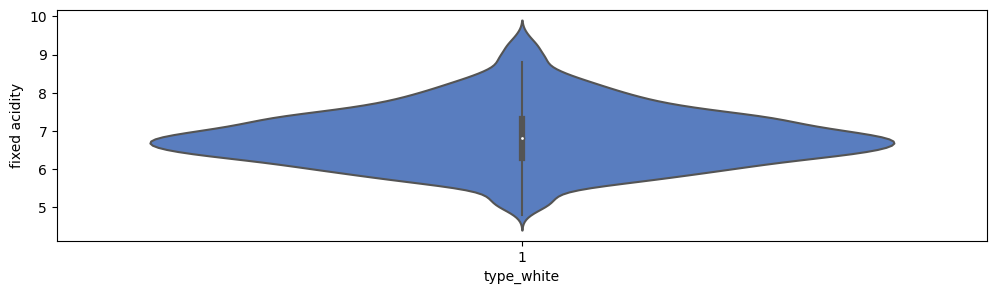

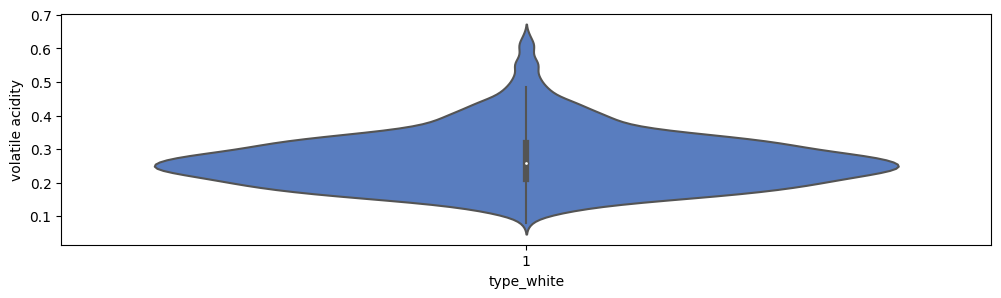

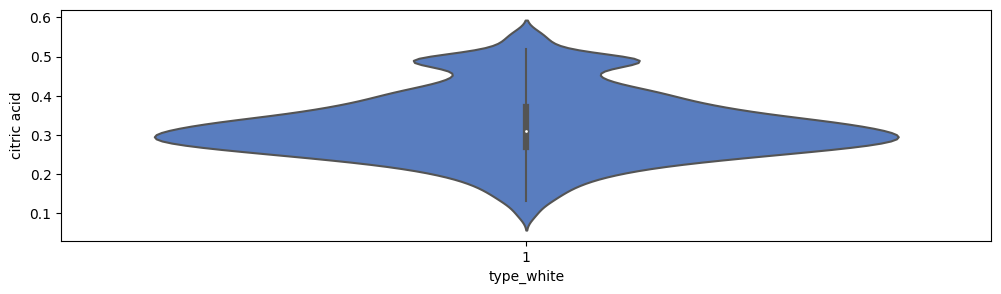

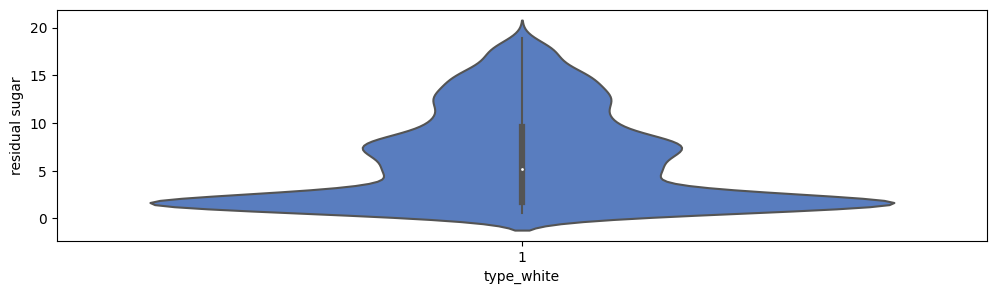

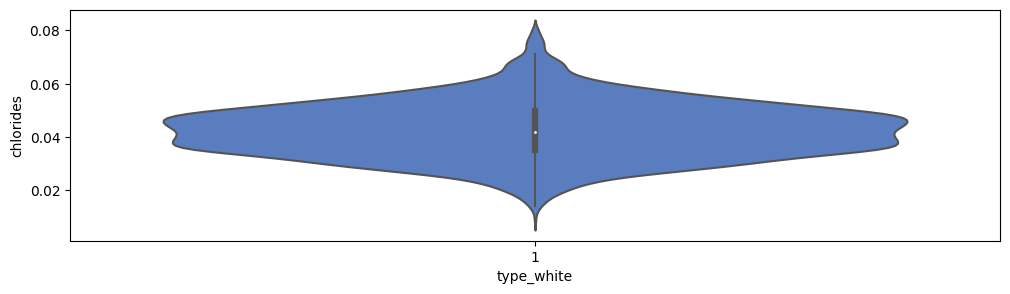

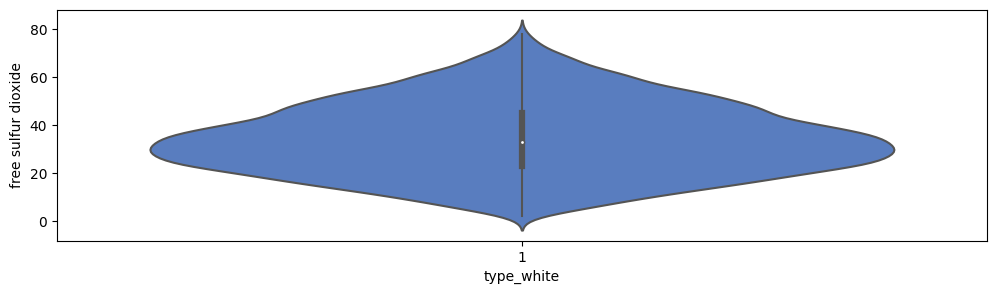

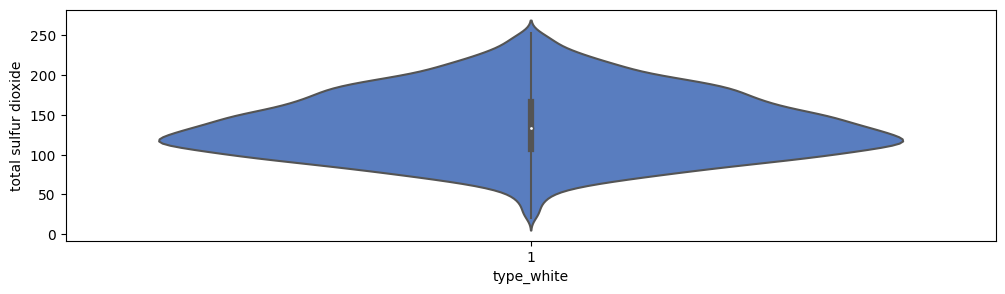

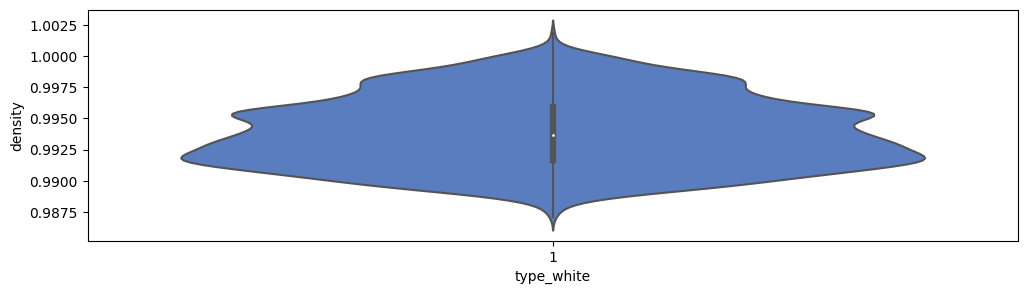

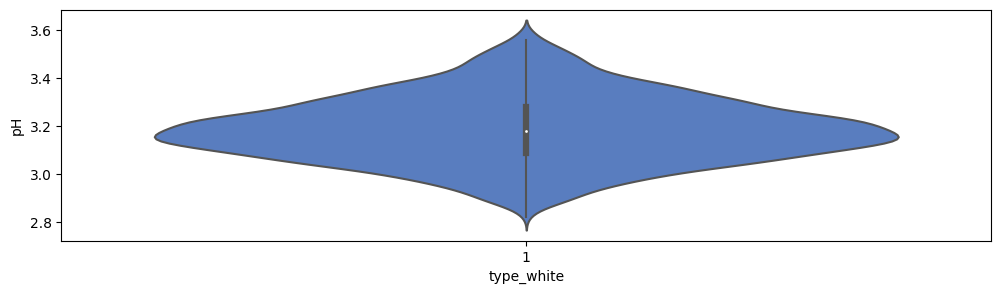

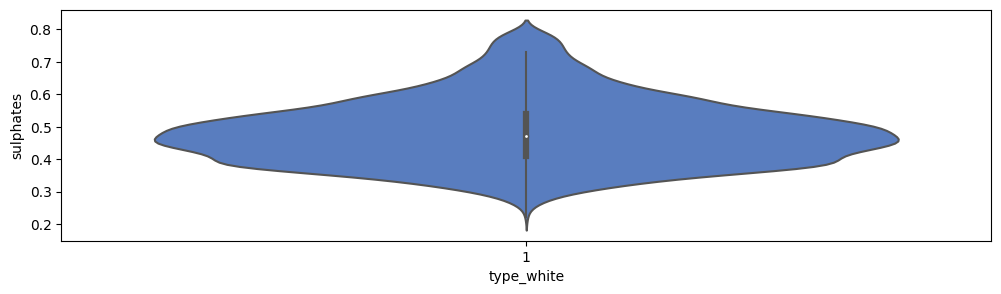

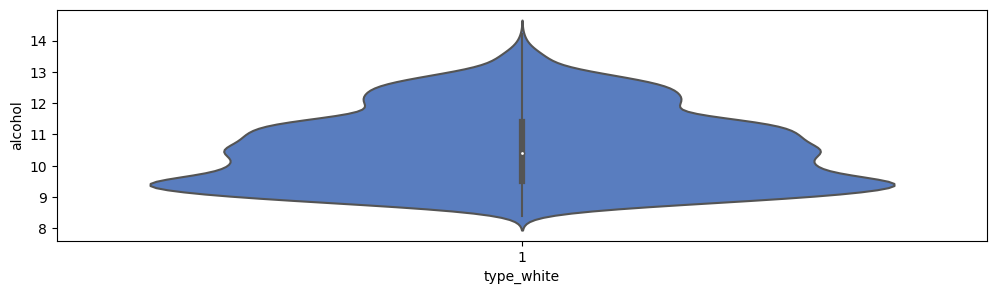

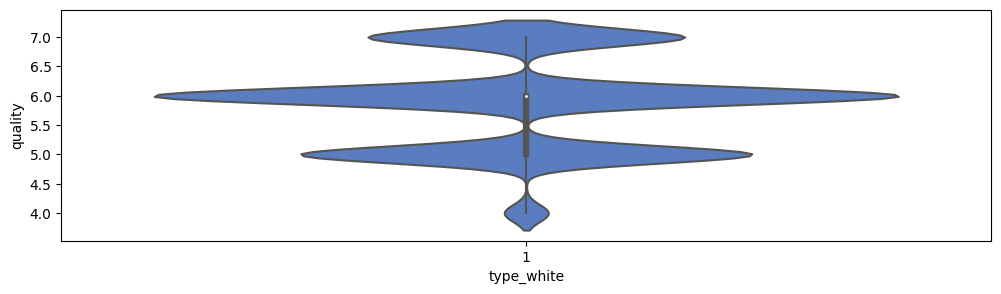

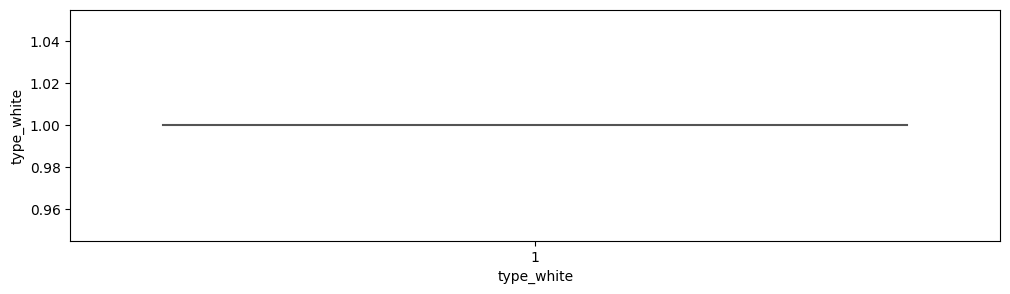

In [19]:
#The main body of the violin plot represents the probability density of the data at different values. 

#It shows the distribution of the numerical variable(s).
#Symmetry and Skewness:

#The width of the violin plot at different points along the x-axis represents the density of data at those points. 
#A wider section indicates a higher density of data, while a narrower section indicates a lower density
#. This allows you to observe the symmetry or skewness of the distribution.
for i in df.columns:
    # Adjust figure size as needed

    plt.figure(figsize=(12, 3))
    sns.violinplot(x='type_white', y=df[i], data=df, palette='muted', split=True)
    plt.show()

In [20]:
#machine learning 
#supervised
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [21]:
x=df.drop('quality',axis=1)
y=df['quality']
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.2,random_state=123)

In [22]:
model = LinearRegression()

# Fit the model to the data
model.fit(x_train, y_train)
print(model)
# Make predictions
predictions = model.predict(x_test)
print(predictions)


LinearRegression()
[5.61396299 6.1882022  6.37850705 5.28676269 5.53873042 6.38105906
 5.83365016 6.26694861 5.50710501 6.41594437 5.5140201  5.98563289
 6.80546302 4.74888676 6.49688273 6.08794353 6.03226129 5.62205749
 5.9596707  5.53120212 5.96126648 6.12306475 5.42896235 5.45984384
 5.44381896 5.8338025  5.59181384 6.32714755 6.02549687 6.12785596
 6.03909053 5.88462814 6.00972529 6.28899081 5.12938414 4.97395666
 5.0615541  6.02497053 5.72617498 4.93460871 6.27196978 5.27976538
 5.9469745  5.97688107 5.06245204 6.28217569 5.1254358  6.26618239
 6.19922767 5.56312417 5.63987217 5.34864213 5.58083198 6.08029122
 5.52393268 5.42421779 5.93867476 5.72772834 5.36642153 5.91537137
 5.64786358 6.01739509 6.18118033 6.01111179 5.77897441 6.30285786
 5.65962596 6.42262909 5.71459188 5.81578252 5.57144138 6.50133912
 5.84854293 6.0672703  5.25367999 5.47179634 5.11427385 6.01274666
 6.06878523 5.90112775 5.8684527  5.09006187 5.76164057 5.62706107
 6.46151176 5.66618348 6.31217628 5.7243828

In [23]:
from sklearn.metrics import r2_score

# Make predictions on the test set
predictions = model.predict(x_test)

# Calculate R-squared
r2 = r2_score(y_test, predictions)

print(f'R-squared: {r2}')



R-squared: 0.2717488073433201


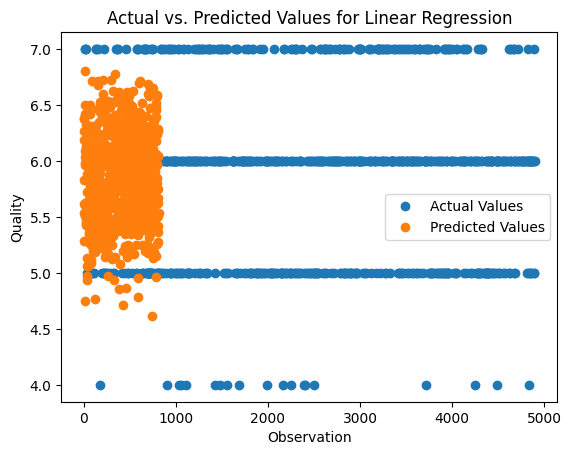

In [24]:
plt.plot(y_test, label='Actual Values', marker='o', linestyle='None')
plt.plot(predictions, label='Predicted Values', marker='o', linestyle='None')
plt.xlabel("Observation")
plt.ylabel("Quality")
plt.title("Actual vs. Predicted Values for Linear Regression")
plt.legend()
plt.show()

In [25]:
model = LogisticRegression()

# Fit the model to the data
model.fit(x_train, y_train)
print(model)
# Make predictions
predictions = model.predict(x_test)
print(predictions)


LogisticRegression()
[6 6 6 6 5 6 6 6 6 7 5 6 7 5 7 6 6 6 6 6 6 6 6 5 5 6 6 7 6 6 6 6 6 6 5 5 5
 6 6 5 6 5 6 6 6 6 6 6 6 5 5 6 6 6 5 5 6 6 5 6 6 6 6 5 6 6 6 6 5 6 5 6 6 6
 5 6 6 6 6 6 6 5 6 6 6 5 6 6 6 6 6 6 6 6 7 6 6 6 6 7 6 6 6 6 6 5 6 6 6 6 6
 6 6 6 6 6 6 5 6 6 7 6 6 6 5 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6
 6 5 6 5 5 6 6 6 5 6 5 6 5 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 5 6 5 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 5 6 6 6 6 6 6 6 6 6 5 7 5 6 6 6 6 6 6 5 6
 6 6 6 7 6 6 5 6 5 6 6 6 6 6 6 6 6 6 5 6 5 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6
 6 6 6 5 5 6 6 6 6 6 6 5 6 6 6 5 6 6 6 5 6 6 6 6 6 6 6 5 6 5 6 6 6 6 6 6 6
 5 6 6 6 6 6 5 6 6 5 6 6 6 6 6 6 5 6 6 6 7 6 5 6 6 6 6 6 5 5 6 6 6 6 6 6 6
 6 5 7 6 7 6 7 6 6 5 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 5 6
 6 6 6 6 5 5 5 6 6 5 6 6 6 5 6 5 6 6 6 5 6 6 5 6 6 6 5 6 6 6 6 6 7 6 6 6 7
 6 6 6 6 6 6 5 6 6 6 5 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 5 5 6 6 6 6 6 5 6 6 6 5 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 5 7 6 6 6
 6 6

C:\Users\Akshra_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
cm = confusion_matrix(y_test, predictions)

In [27]:
print(cm)

[[  0  10   8   1]
 [  0  52 188   4]
 [  0  57 310  15]
 [  0  13 143  12]]


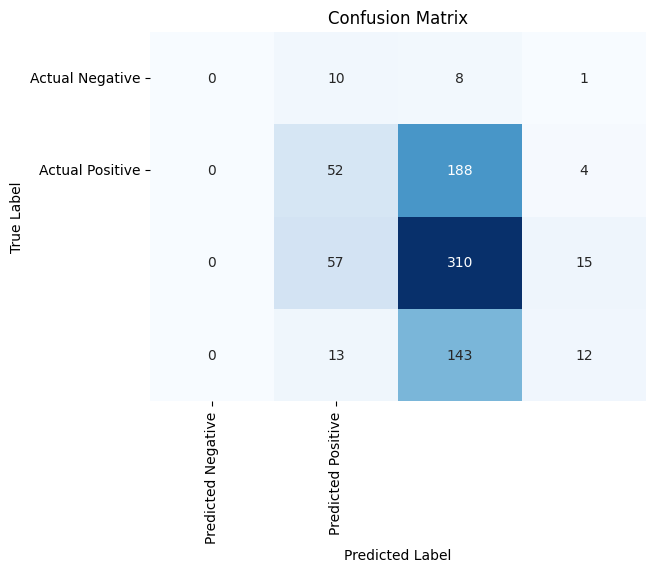

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x and y are your feature matrix and target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Create and fit an SVM model
model = SVC(kernel='linear', C=1.0)
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Create a confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

